# Задание 4

Склеивание двух изображений, используя пирамиды

### Библиотеки

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Начальные изображения

Первое изображение в RBG

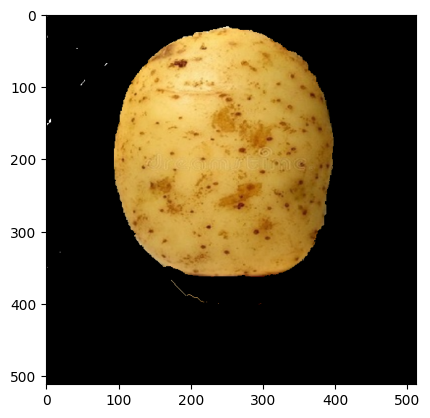

In [8]:
potato = cv2.imread("potato.png")
potato = cv2.cvtColor(potato, cv2.COLOR_BGR2RGB)
plt.imshow(potato)

Второе изображение в RBG

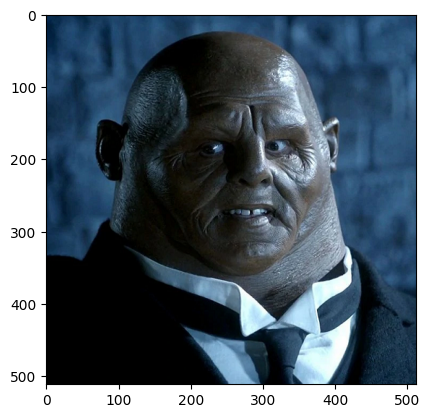

In [9]:
strax = cv2.imread("strax.png")
strax = cv2.cvtColor(strax, cv2.COLOR_BGR2RGB)
plt.imshow(strax)

#### Грубое склеивание

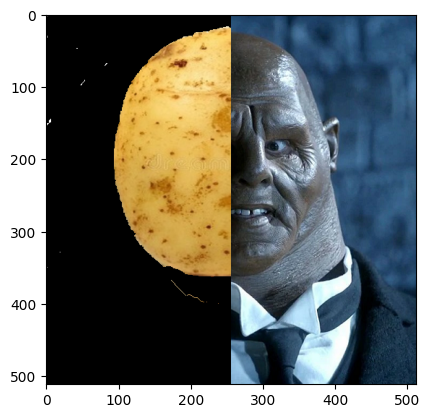

In [15]:
potato_strax = np.hstack((potato[:, :256], strax[:, 256:]))
plt.imshow(potato_strax)

#### Склеивание с помощью пирамид

##### Пирамиды Гаусса

Подготовка копий для пирамид Гаусса

In [18]:
# копии изображений
potato_copy = potato.copy()
strax_copy = strax.copy()
# для хранения пирамид Гаусса
gaussianPyramid_potato = [potato_copy]
gaussianPyramid_strax = [strax_copy]

Создание пирамид Гаусса - шесть штук, меньше оригинала

In [19]:
for i in range(6):
    potato_copy = cv2.pyrDown(potato_copy)
    gaussianPyramid_potato.append(potato_copy)
    strax_copy = cv2.pyrDown(strax_copy)
    gaussianPyramid_strax.append(strax_copy)

##### Пирамиды Лапласа

Создание копий для пирамид Лапласа - начиная от последней пирамиды Гаусса

In [24]:
potato_copy = gaussianPyramid_potato[5]
strax_copy = gaussianPyramid_strax[5]
laplacianPyramid_potato = [potato_copy]
laplacianPyramid_strax = [strax_copy]

Создание пирамид Лапласа от пирамид Гаусса - движение вверх, увеличение размера

In [25]:
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gaussianPyramid_potato[i])
    laplacian = cv2.subtract(gaussianPyramid_potato[i-1], gaussian_expanded)
    laplacianPyramid_potato.append(laplacian)
    gaussian_expanded = cv2.pyrUp(gaussianPyramid_strax[i])
    laplacian = cv2.subtract(gaussianPyramid_strax[i-1], gaussian_expanded)
    laplacianPyramid_strax.append(laplacian)

Склеивание двух изображений в одно

In [10]:
# хранит итоговое изображение
potato_strax_pyramid = []
n = 0
# равномерно проходим по двум изображениям - по строкам
for potato_laplacian, strax_laplacian in zip(laplacianPyramid_potato, laplacianPyramid_strax):
    n += 1
    # склеиванием участок - левая половина от первого изображения, правая - от второго
    laplacian = np.hstack((potato_laplacian[:, 0:potato_laplacian.shape[1]//2], strax_laplacian[:, potato_laplacian.shape[1]//2::]))
    # добавляем строку к итогу
    potato_strax_pyramid.append(laplacian)

Собираем полученные "склейки" пирамид Лапласа в единое изображение

In [ ]:
potato_strax_reconstruct = potato_strax_pyramid[0]
for i in range(1, 6):
    potato_strax_reconstruct = cv2.pyrUp(potato_strax_reconstruct)
    potato_strax_reconstruct = cv2.add(potato_strax_pyramid[i], potato_strax_reconstruct)

Итоговое изображение

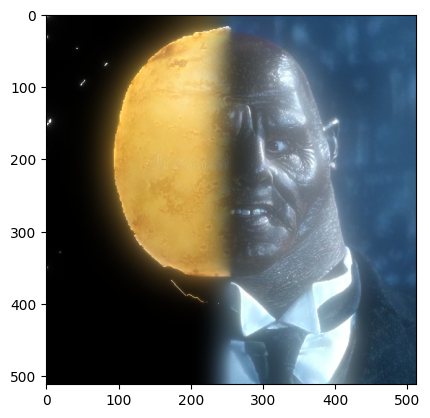

In [12]:
plt.imshow(potato_strax_reconstruct)